In [ ]:
!pip install robin_stocks

In [ ]:
import robin_stocks as r
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt



In [ ]:
# login = r.login('username','password')

In [ ]:
def get_pc(ticker,dates,show_plot = False):
  pc_ratio = {}
  for date in dates: 
    print(date)
    optionData = r.options.find_options_by_expiration(ticker,date)
    d = pd.DataFrame.from_dict(optionData)
    df = d[['strike_price','type','open_interest']].copy()
    df_calls = df[df['type'] == 'call'].sort_values(by=['strike_price'])
    df_calls['strike_price'] = pd.to_numeric(df_calls['strike_price']).astype(int)

    df_puts = df[df['type'] == 'put'].sort_values(by=['strike_price'])
    df_puts['strike_price'] = pd.to_numeric(df_puts['strike_price']).astype(int)
    df_merge = pd.concat({
      'Calls': df_calls.set_index('strike_price')['open_interest'], 'Puts': df_puts.set_index('strike_price')['open_interest']
  }, axis=1)
    df_merge = df_merge.loc[~(df_merge==0).all(axis=1)]
    pc_ratio[date] = df_merge['Puts'].sum()/df_merge['Calls'].sum()

    if show_plot == True:
      fig, ax = plt.subplots()
      df_merge.reset_index().plot(x= 'strike_price',y = ['Calls','Puts'], kind = 'bar', color = ['g','r'], figsize = (18,8),ax = ax)

      ax.set_title("Date: {}, P/C ratio = {}".format(date,pc_ratio[date]))
      plt.show()
  return pc_ratio

2021-01-06
Found Additional pages.
Loading page 2 ...
Loading page 3 ...
Loading Market Data \Loading Market Data |Loading Market Data /Loading Market Data -Loading Market Data \Loading Market Data |Loading Market Data /Loading Market Data -Loading Market Data \Loading Market Data |Loading Market Data /Loading Market Data -Loading Market Data \Loading Market Data |Loading Market Data /Loading Market Data -Loading Market Data \Loading Market Data |Loading Market Data /Loading Market Data -Loading Market Data \Loading Market Data |Loa

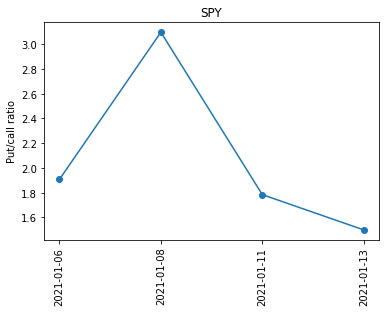

CPU times: user 7.26 s, sys: 805 ms, total: 8.07 s
Wall time: 2min 44s


In [ ]:
%%time
ticker = 'TSLA'
ticker = 'SPY'
d = r.options.get_chains(ticker, info=None)
dates = d['expiration_dates'][:4]
pc_ratio = get_pc(ticker,dates,show_plot = False)
# dates.remove('')
plt.plot(list(pc_ratio.keys()),list(pc_ratio.values()),marker='.',markersize=12)
plt.xticks(rotation  = 90)
plt.ylabel('Put/call ratio')
plt.title(ticker)
plt.show()

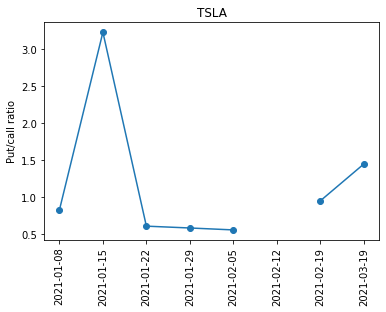

In [ ]:
plt.plot(list(pc_ratio.keys()),list(pc_ratio.values()),marker='.',markersize=12)
plt.xticks(rotation  = 90)
plt.ylabel('Put/call ratio')
plt.title(ticker)
plt.show()
